In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

from Cho2017 import SubjectData


plt.rcParams['figure.figsize'] = [12, 8]

# # Make sure ipympl is installed (via pip) for interactive plots in Jupyter 
# %matplotlib widget

In [2]:
s01 = SubjectData('s01.mat')

Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=71680
    Range : 0 ... 71679 =      0.000 ...   139.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=71680
    Range : 0 ... 71679 =      0.000 ...   139.998 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=34048
    Range : 0 ... 34047 =      0.000 ...    66.498 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=5120
    Range : 0 ... 5119 =      0.000 ...     9.998 secs
Ready.
Creating RawArray with float64 data, n_channels=68, n_times=5120
    Range : 0 ... 5119 =      0.

In [3]:
tmin = -0.2
tmax = 2
events = mne.find_events(s01.raw_imagery_left, stim_channel=s01.stim_channel)
reject_criteria = {'eeg': 250e-6}       # 150 µV The default from the overview tutorial
im_left_epochs = mne.Epochs(s01.raw_imagery_left, events, tmin=tmin, tmax=tmax, preload=True, reject=reject_criteria)
im_right_epochs = mne.Epochs(s01.raw_imagery_right, events, tmin=tmin, tmax=tmax, preload=True, reject=reject_criteria)

100 events found
Event IDs: [1]
Not setting metadata
Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 100 events and 1127 original time points ...
    Rejecting  epoch based on EEG : ['P10']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'AF7', 'AF3', 'FPZ', 'FP2', 'AF8', 'AF4', 'AFZ', 'P10']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['P10']
    Rejecting  epoch based on EEG : ['P10']
    Rejecting  epoch based on EEG : ['CP1', 'P10']
    Rejecting  epoch based on EEG : ['P10']
    Rejecting  epoch based on EEG : ['P10']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'P10']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'P10']
    Rejecting  epo

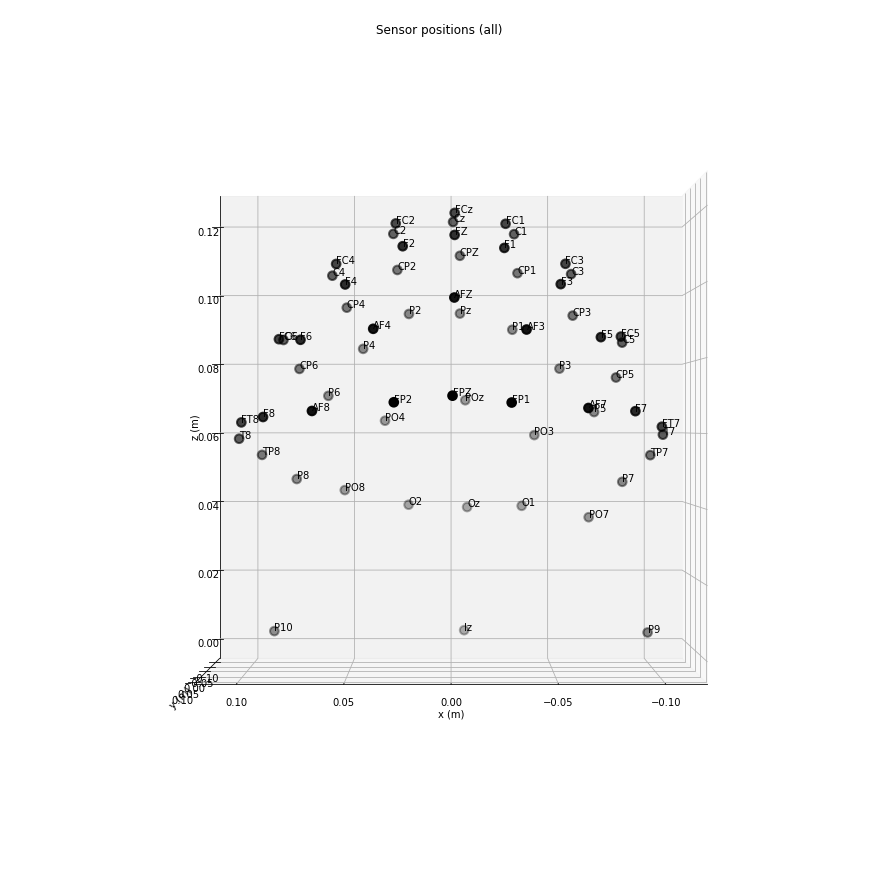

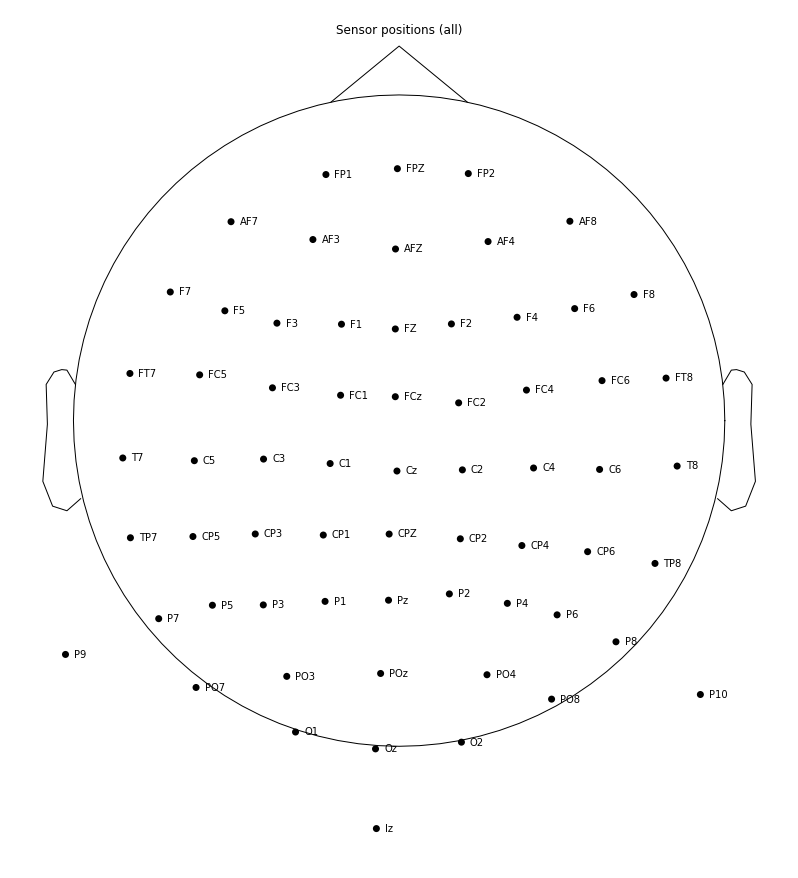

In [4]:
im_left_epochs.plot_sensors(kind='3d', ch_type='all', show_names=True)
im_left_epochs.plot_sensors(kind='topomap', ch_type='all', show_names=True);

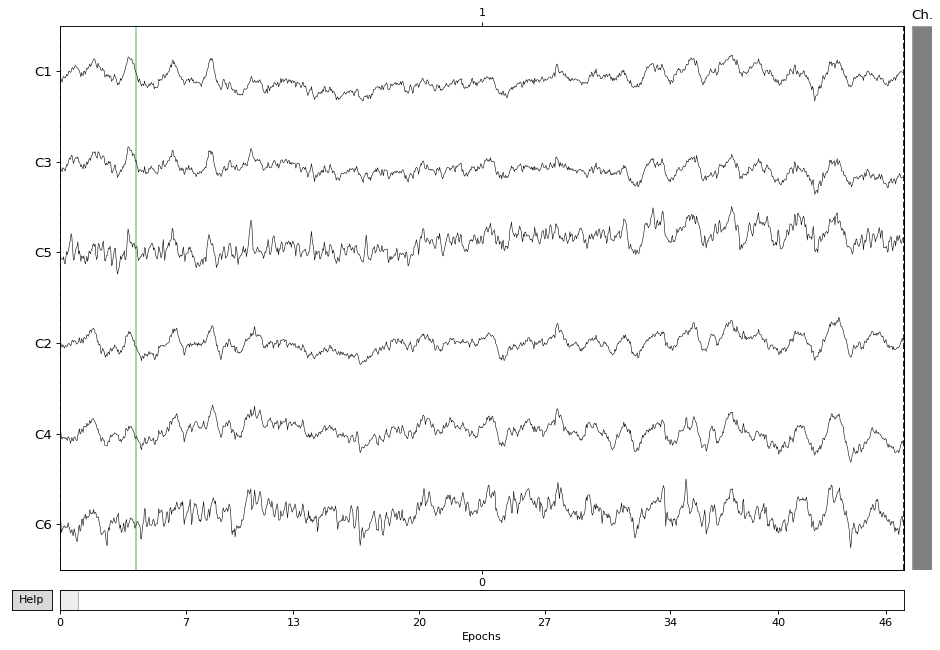

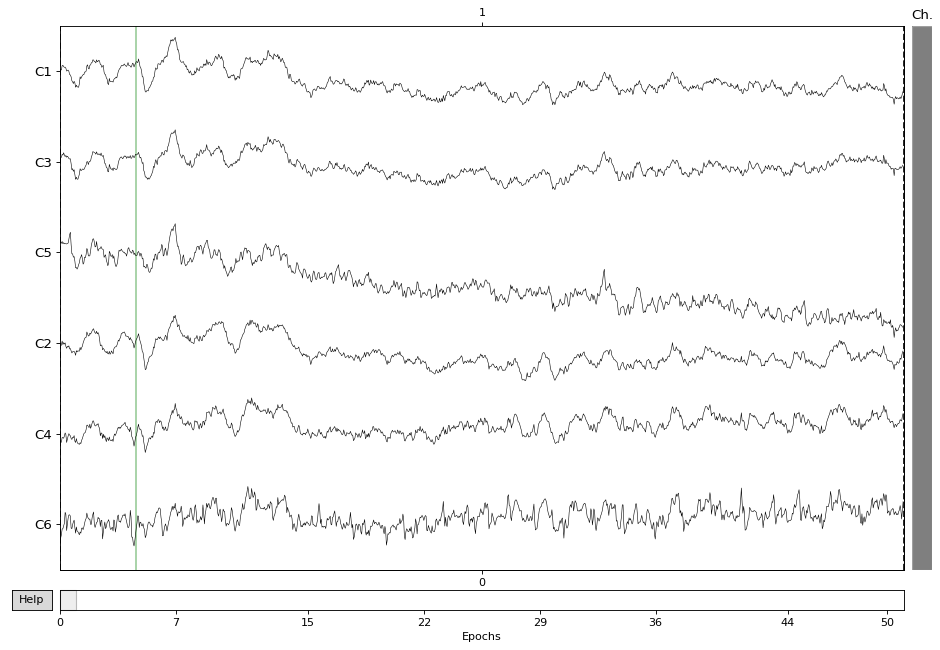

    Using multitaper spectrum estimation with 7 DPSS windows


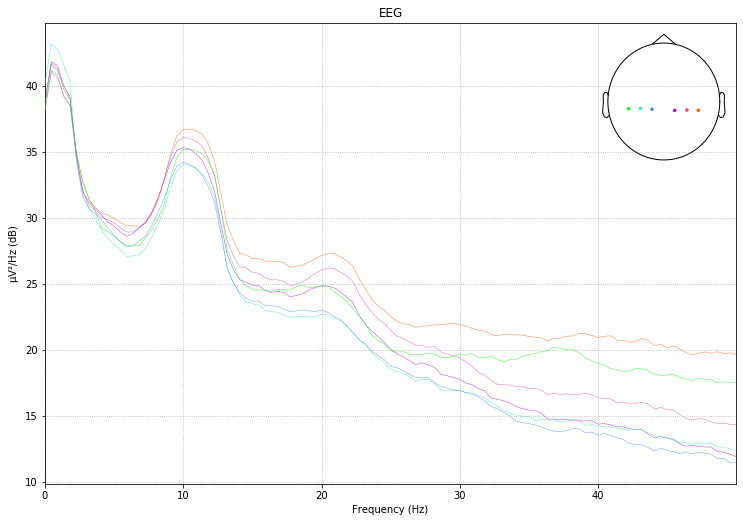

    Using multitaper spectrum estimation with 7 DPSS windows


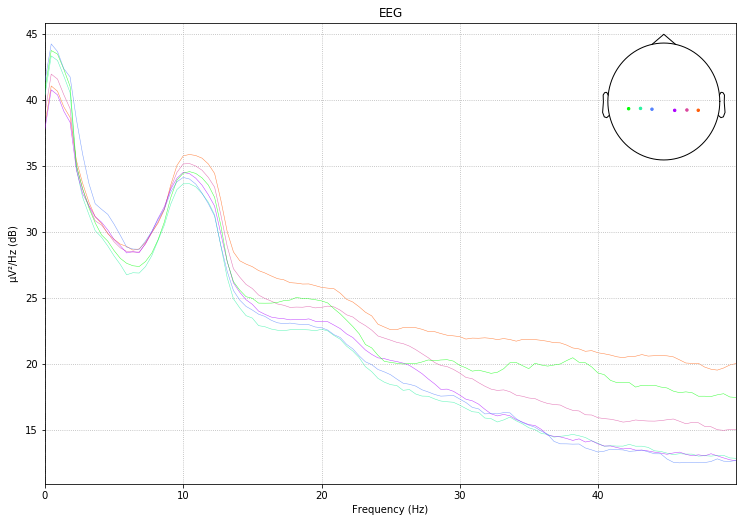

Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


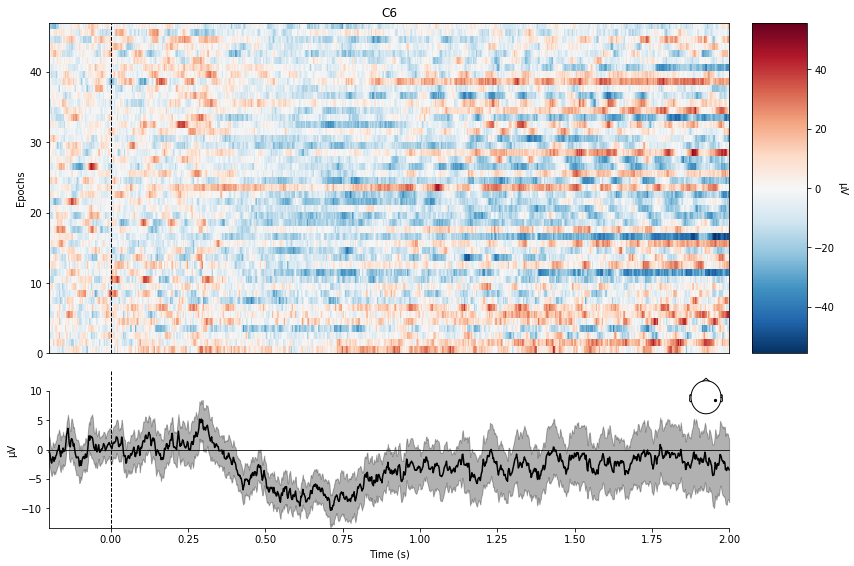

Not setting metadata
Not setting metadata
51 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


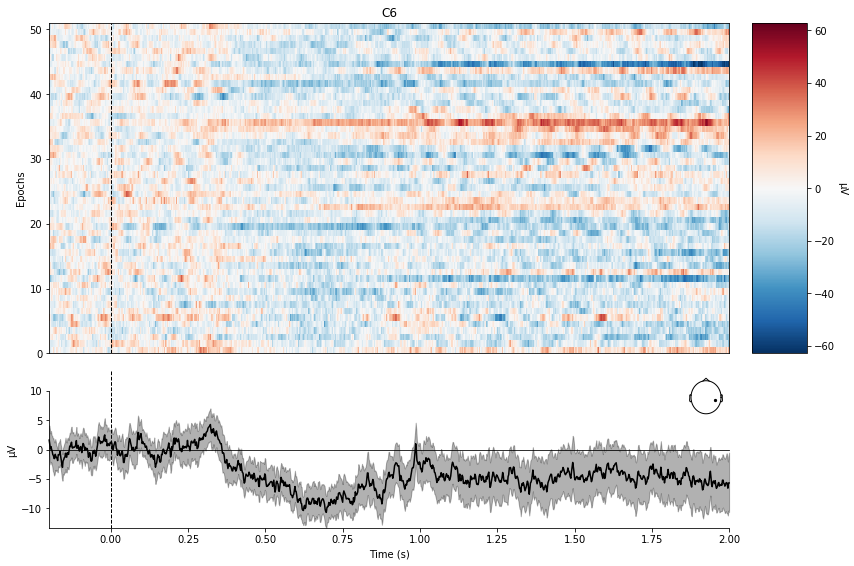

[<Figure size 864x576 with 4 Axes>]

In [5]:
picks = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
im_left_epochs.plot(title='Im Left', picks=picks, n_epochs=1)
im_right_epochs.plot(title='Im Right', picks=picks, n_epochs=1)
im_left_epochs.plot_psd(picks=picks, fmax=50)
im_right_epochs.plot_psd(picks=picks, fmax=50)
im_left_epochs.plot_image(picks='C6')
im_right_epochs.plot_image(picks='C6')

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 0.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


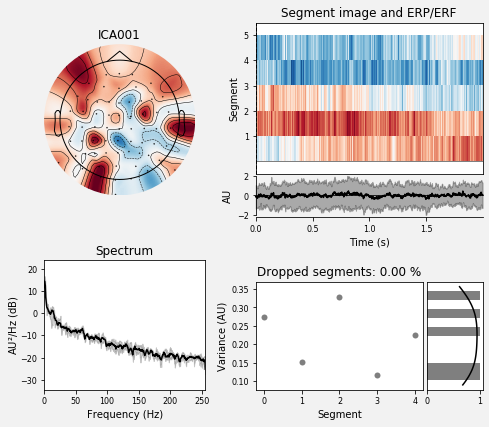

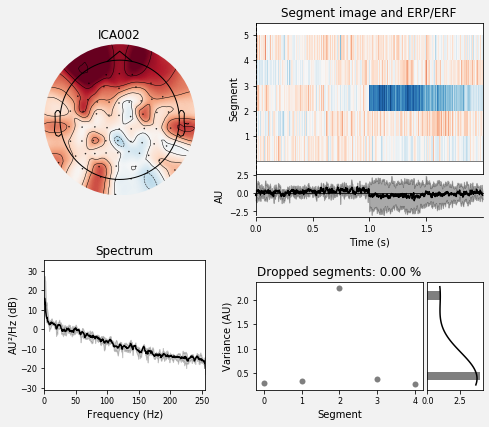

Transforming to ICA space (20 components)
Zeroing out 2 ICA components


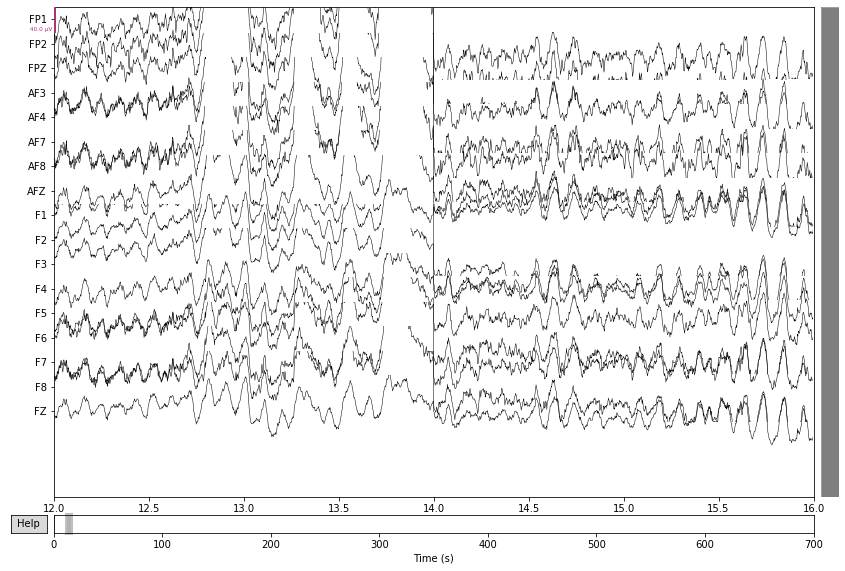

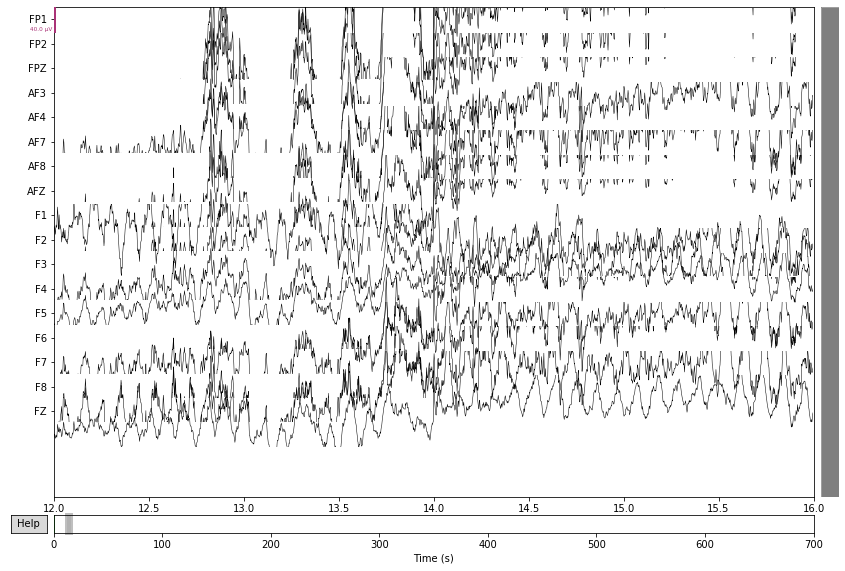

In [6]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(s01.raw_noise['blinking'])
ica.exclude = [1, 2]  # details on how we picked these are omitted here from tutorial
ica.plot_properties(s01.raw_noise['blinking'], picks=ica.exclude)

raw = s01.raw_imagery_left.copy()
ica.apply(raw)
# show some frontal channels to clearly illustrate the artifact removal
chs = ['FP1', 'FP2', 'FPZ', 'AF3', 'AF4', 'AF7', 'AF8', 'AFZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FZ']
chan_idxs = [s01.channel_names.index(ch) for ch in chs]
s01.raw_imagery_left.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4);

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 0.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


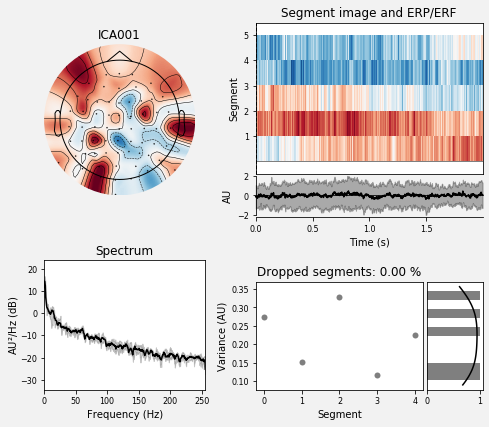

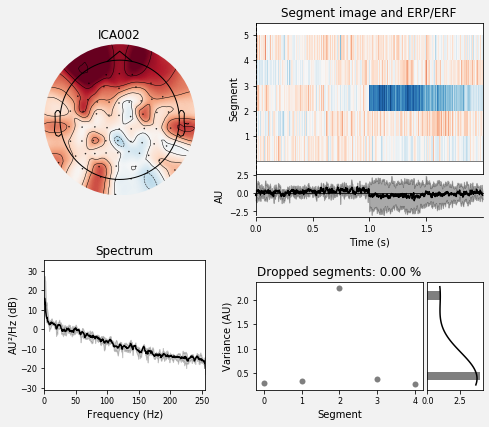

Transforming to ICA space (20 components)
Zeroing out 2 ICA components


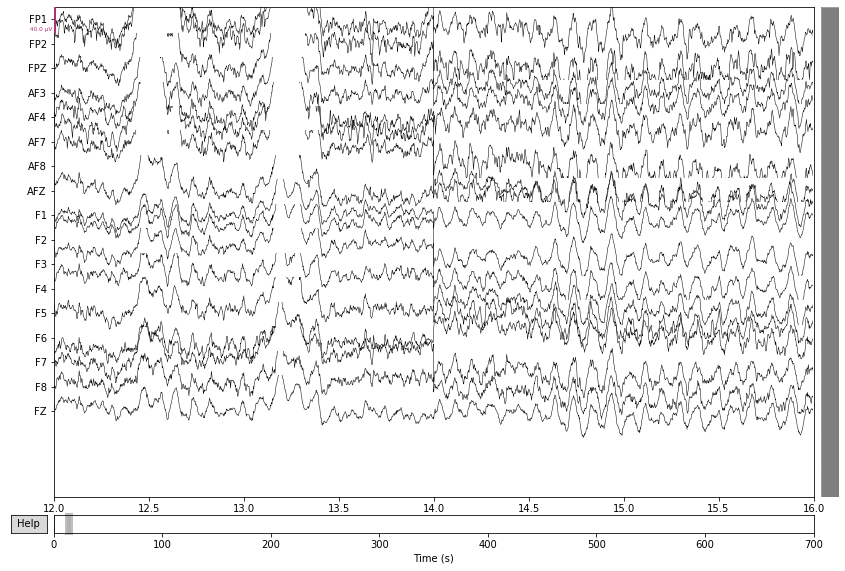

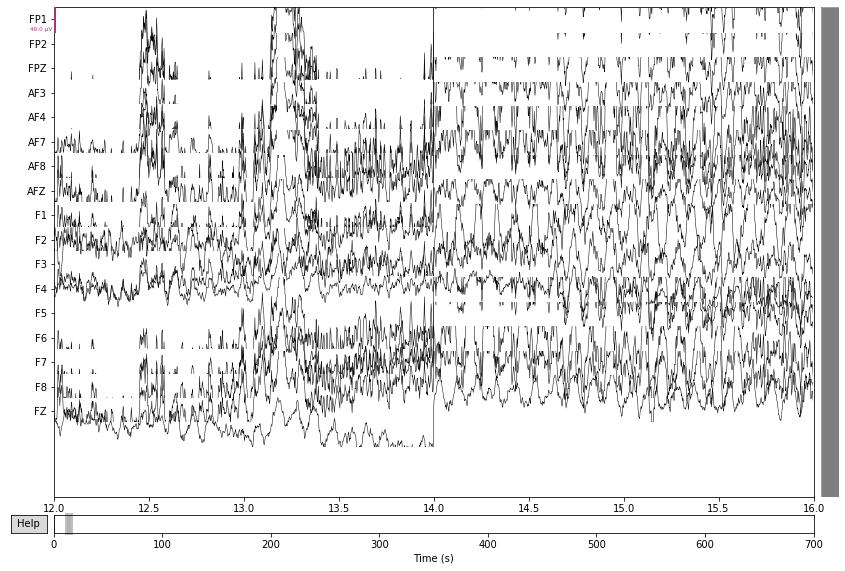

In [7]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(s01.raw_noise['blinking'])
ica.exclude = [1, 2]  # details on how we picked these are omitted here from tutorial
ica.plot_properties(s01.raw_noise['blinking'], picks=ica.exclude)

raw = s01.raw_imagery_right.copy()
ica.apply(raw)
# show some frontal channels to clearly illustrate the artifact removal
chs = ['FP1', 'FP2', 'FPZ', 'AF3', 'AF4', 'AF7', 'AF8', 'AFZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FZ']
chan_idxs = [s01.channel_names.index(ch) for ch in chs]
s01.raw_imagery_right.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4);